<h3><center>This Notebook contains Data Wrangling; Exploratory Data Analysis; Model Development, Evaluation, and Refinement</center></h3>
    
<h2><center> Data Wrangling</center></h2>
<center>(Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.)</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Identifying and handling missing values</a></li>
<li><a href="#ref2">Data standardization</a></li>
<li><a href="#ref3">Data Normalization</a></li>
<li><a href="#ref4">Binning</a></li>
<li><a href="#ref5">Creating Indicator/Dummy variable</a></li>

</div>

<h2><center> Exploratory Data Analysis </center></h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref6">Potential Predictor Variables</a></li>
<li><a href="#ref7">Descriptive Statistics</a></li>
<li><a href="#ref8">Groups Analysis</a></li>
<li><a href="#ref9">Correlation and Causation</a></li>    
<li><a href="#ref10">Anova</a></li>
<li><a href="#ref11">Conclusion EDA</a></li>

</div>

<h2><center> Model Development, Evaluation, and Refinement </center></h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref12">Multiple Linear Regression</a></li>
<li><a href="#ref13">Polynomial Regression</a></li>
<li><a href="#ref14">Random Forest Regression</a></li>
<li><a href="#ref15">Best Model Refinement</a></li>

</div>

The "Automobile Data Set" used in this notebook can be found from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. 

###### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

<h1><center> Data Wrangling </center></h1>

###### Loading dataset

Use the Pandas method **read_csv()** to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [2]:
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df.shape

(205, 26)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks (?) appeared in the dataframe; those are missing values which may hinder our further analysis. 

<a id="ref1"></a>
### 1. Identify and handle missing values

###### Convert "?" to NaN

In [4]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


###### Evaluating for any Missing Data

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###### Count missing values in each column

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on the summary above, each column has 205 rows of data, with seven columns containing missing data:

1. "normalized-losses": 41 missing data
2. "num-of-doors": 2 missing data
3. "bore": 4 missing data
4. "stroke" : 4 missing data
5. "horsepower": 2 missing data
6. "peak-rpm": 2 missing data
7. "price": 4 missing data

###### Dealing with missing data
    1. Drop data 
        a. drop the whole row
        b. drop the whole column
    2. Replace data
        a. replace it by mean
        b. replace it by frequency
        c. replace it based on other functions

###### Replace "NaN" in various columns with the average of their columns

In [7]:
columns = ["normalized-losses", 'bore', "stroke", 'horsepower', 'peak-rpm']

for column in columns:    
    avg = df[column].astype("float").mean(axis = 0)
    df[column].replace(np.nan, avg, inplace = True)

###### Replace "NaN" in various columns with the most frequent class of their columns

In [8]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to automatically calculate the most common type:

In [9]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [10]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

###### For certain column, drop the entire rows

In [11]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, we obtain the dataset with **no missing values**.

###### Correct  data format

Let's list the data types for each column:

In [13]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int', however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.  

In [14]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### Let us list the columns after the conversion:  

In [15]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

<a id="ref2"></a>
### 2. Data Standardization

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.
We will need to apply data transformation to transform mpg into L/100km.
The formula for unit conversion is
L/100km = 235 / mpg

In [16]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df[['city-L/100km',"city-mpg","highway-L/100km","highway-mpg"]].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.190476,21,8.703704,27
1,11.190476,21,8.703704,27
2,12.368421,19,9.038462,26
3,9.791667,24,7.833333,30
4,13.055556,18,10.681818,22


<a id="ref3"></a>
### 3. Data Normalization 

In [17]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<a id="ref4"></a>
### 4. Binning

 Convert data to correct format: 

In [18]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)

We would like four bins of equal size bandwidth. The fourth is because the function "cut"  includes the rightmost value: 

In [19]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
binwidth

53.5

We build a bin array with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins:

In [20]:
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

 We set group  names:

In [21]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" to determine what each value of "df['horsepower']" value belongs to. 

In [22]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
<div>We successfully narrow the intervals from 57 to 3!</div>

###### Bins visualization 

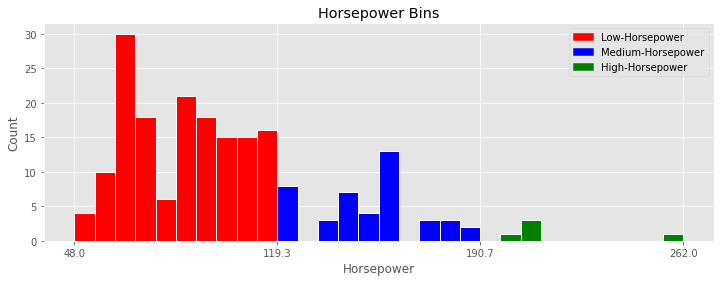

In [23]:
mpl.style.use(['ggplot']) 

total_categories = 3

# let's get the x-tick values
count, bin_edges = np.histogram(df["horsepower"], 3)

fig, ax = plt.subplots(figsize=(12,4))
N, bins, patches = ax.hist(df["horsepower"],bins=total_categories*10, edgecolor='white', linewidth=1)
for i in range(0,10):
    patches[i].set_facecolor('r')
for i in range(10,20):    
    patches[i].set_facecolor('b')
for i in range(20,30):
    patches[i].set_facecolor('g')

ax.set_xticks(bin_edges)

ax.set_title('Horsepower Bins')
ax.set_ylabel('Count')
ax.set_xlabel('Horsepower')

red_patch = mpatches.Patch(color='red', label='Low-Horsepower')
blue_patch = mpatches.Patch(color='blue', label='Medium-Horsepower')
green_patch = mpatches.Patch(color='green', label='High-Horsepower')
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.show()

The plot above shows the binning result for attribute "horsepower". 

<a id="ref5"></a>
### 5. Creating Indicator Variable (or dummy variable)

In [24]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

 Get indicator variables and assign it to data frame "dummy_variable_1": 

In [25]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel-type, Length: 201, dtype: object

In [26]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [27]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [28]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [29]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

In [30]:
###### Repeat same steps for creating dummy variables for 'aspiration' feature

In [31]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [32]:
df.to_csv('clean_df.csv')

<h1><center>Exploratory Data Analysis</center></h1>

###### We will use cleaned data frame generated after data wrangling

When visualizing individual variables, it is important to first understand what type of variable we are dealing with.

In [33]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

<a id="ref6"></a>
### 6. Potential Predictor Variables

###### Finding potential continuous predictor  variables for price

Finding the correlation between variables  of type "int64" or "float64"

In [34]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


The possible predictor variables are 'engine-size' , 'highway-mpg', 'peak-rpm', and 'stroke'.

In [35]:
df[['price','engine-size' ,'highway-mpg','peak-rpm',"stroke"]].corr()["price"]

price          1.000000
engine-size    0.872335
highway-mpg   -0.704692
peak-rpm      -0.101616
stroke         0.082269
Name: price, dtype: float64

From above it can be concluded that engine-size has strong linear relationship; highway-mpg has strong negative linear relationship; peak-rpm and stroke both has weak linear relationship with price.

Visualizing the linear relationship for possible predictor variables

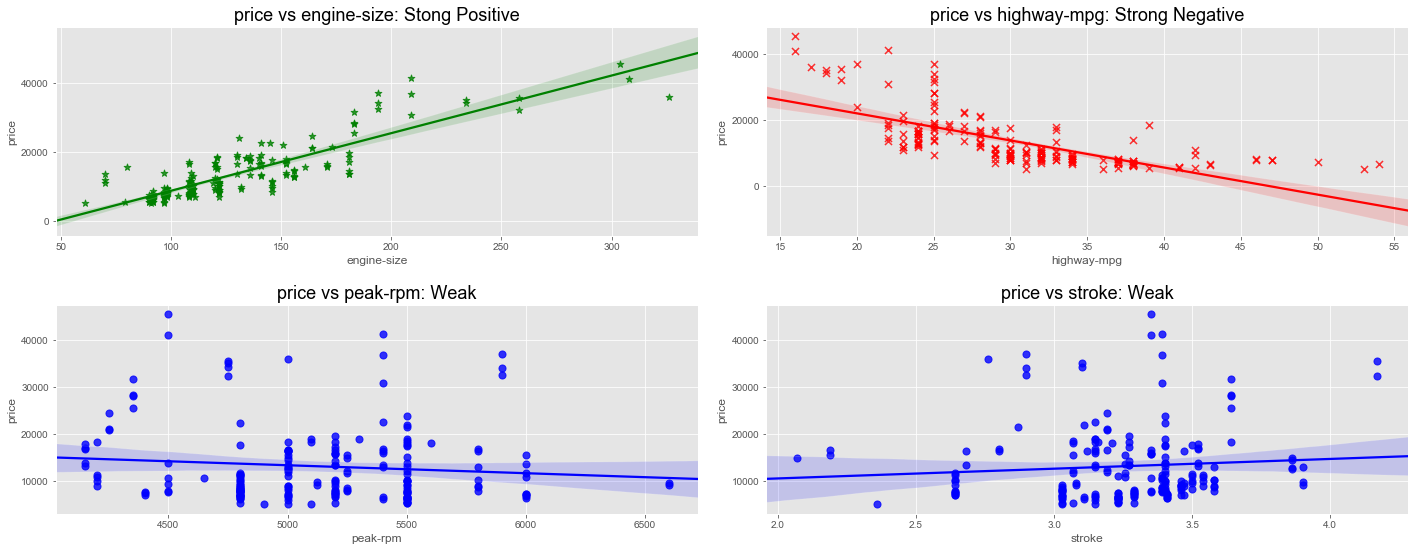

In [36]:
fig = plt.figure(figsize=(20,8)) # create figure

ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2) 
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

sns.set(font_scale=1.5)

# Subplot 1: 
sns.regplot(x='engine-size', y='price', data=df, color='green', marker='*', scatter_kws={'s': 50},ax=ax0)
ax0.set_title('price vs engine-size: Stong Positive')

# Subplot 2: 
sns.regplot(x='highway-mpg', y='price', data=df, color='red', marker='x', scatter_kws={'s': 50},ax=ax1)
ax1.set_title('price vs highway-mpg: Strong Negative')

# Subplot 3: 
sns.regplot(x='peak-rpm', y='price', data=df, color='blue', marker='o', scatter_kws={'s': 50},ax=ax2)
ax2.set_title('price vs peak-rpm: Weak')

# Subplot 4: 
sns.regplot(x="stroke", y='price', data=df, color='blue', marker='o', scatter_kws={'s': 50},ax=ax3)
ax3.set_title('price vs stroke: Weak')

fig.tight_layout()

plt.show()

###### Finding potential categorical predictor  variables for price

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

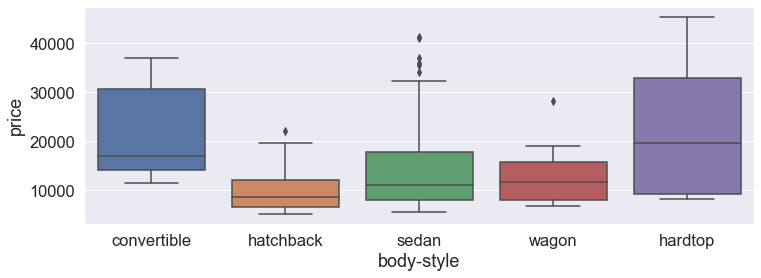

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price" :

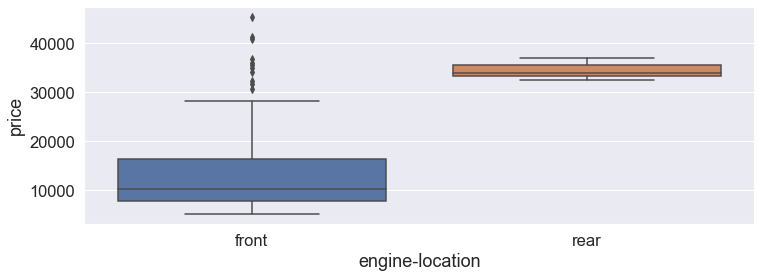

In [38]:
plt.figure(figsize=(12,4))
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price. <br>
Let's examine drive wheels and price.

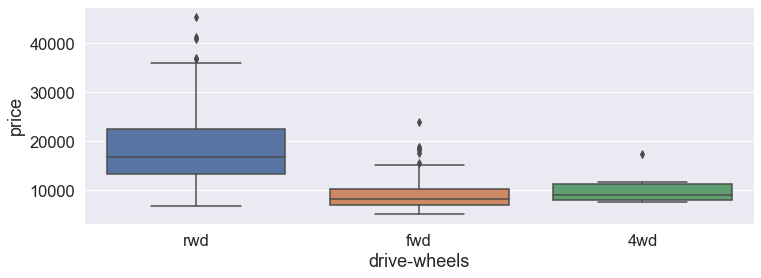

In [39]:
# drive-wheels
plt.figure(figsize=(12,4))
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

<a id="ref7"></a>
### 7. Descriptive Statistical Analysis

The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [41]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


Value_counts is a good way of understanding how many units of each characteristic/variable we have.

In [42]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts':

In [43]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repeat the above process for the variable 'engine-location'

In [44]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, creating a skewed result. Thus, we are not able to draw any conclusions about the engine location.

<a id="ref8"></a>
### 8. Groups Analysis 

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [45]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [46]:
df_group = df[['drive-wheels','price']]
df_group_result = df_group.groupby(['drive-wheels'],as_index= False).mean()
df_group_result

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

we can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [47]:
df_group = df[['drive-wheels','body-style','price']]
df_group_result = df_group.groupby(['drive-wheels','body-style'],as_index= False).mean()
df_group_result

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [48]:
grouped_pivot = df_group_result.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.

In [49]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heat map to visualize the relationship between Body Style vs Price:

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

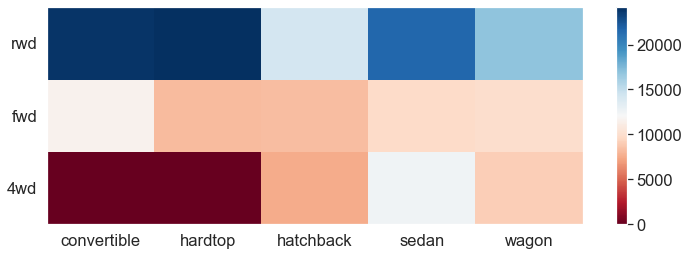

In [50]:
fig, ax=plt.subplots(figsize=(12,4))
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=0)

fig.colorbar(im)

plt.show()

<a id="ref9"></a>
### 9. Correlation and Causation Analysis 

**Correlation**: a measure of the extent of interdependence between variables.<br>
**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining  correlation is much simpler than determining causation, as causation may require independent experimentation.

In [51]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Coefficient for wheel-base vs price is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Coefficient for horsepower vs price is", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Coefficient for length vs price is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Coefficient for width vs price is", pearson_coef, " with a P-value of P =", p_value ) 
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Coefficient for curb-weight vs price is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Coefficient for engine-size vs price is", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Coefficient for bore vs price is", pearson_coef, " with a P-value of P =", p_value ) 
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Coefficient for city-mpg vs price is", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Coefficient for highway-mpg vs price is", pearson_coef, " with a P-value of P =", p_value ) 


The Pearson Coefficient for wheel-base vs price is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20
The Pearson Coefficient for horsepower vs price is 0.809574567003656  with a P-value of P = 6.369057428259557e-48
The Pearson Coefficient for length vs price is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30
The Pearson Coefficient for width vs price is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38
The Pearson Coefficient for curb-weight vs price is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53
The Pearson Coefficient for engine-size vs price is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
The Pearson Coefficient for bore vs price is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17
The Pearson Coefficient for city-mpg vs price is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29
The Pearson Coefficient for highway-mpg vs price is -0.7046922650589529  with a P-value of P =

###### conclusions

All above continuous features are having positive relationship with price making them good predictors of price. The details are given below for each:

Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.543).

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.


<a id="ref10"></a>
### 10. ANOVA 
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**:  P-value tells us the statistical significance of our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

###### ANOVA on Drive Wheels variable

 Let's see if different types 'drive-wheels' impact  'price'. We group the data:

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before-hand.

In [52]:
df_group = df[['drive-wheels','price']]
groups = df_group[['drive-wheels','price']].groupby(['drive-wheels'])
groups.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


 We can obtain the values of the method group using the method "get_group":

In [53]:
groups.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [54]:
# ANOVA
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'], 
                              groups.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing the importance of Drive Wheels for price prediction. The large F test score suggests that the mean price value for these three groups varies alot. Consequently showing a strong correlation of these three groups with price. 
But does this mean all three tested groups are all this highly correlated with price? 

In [55]:
f_val, p_val = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'])  
print( "ANOVA results for separate fwd, rwd: F=", f_val, ", P =", p_val )
f_val, p_val = stats.f_oneway(groups.get_group('4wd')['price'], groups.get_group('rwd')['price'])  
print( "ANOVA results for separate 4wd, rwd: F=", f_val, ", P =", p_val)  
f_val, p_val = stats.f_oneway(groups.get_group('4wd')['price'], groups.get_group('fwd')['price'])  
print( "ANOVA results for separate 4wd, fwd: F=", f_val, ", P =", p_val) 

ANOVA results for separate fwd, rwd: F= 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results for separate 4wd, rwd: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results for separate 4wd, fwd: F= 0.665465750252303 , P = 0.41620116697845666


The separate results show that main variation of price mean values is in fwd and rwd groups. So even inside feature "Drive Wheels", these two groups are most important.

<a id="ref11"></a>
### 11. Conclusion Exploratory Data Analysis

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

In [56]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

<h1><center>Model Development and Evaluation</center></h1>

Let's develop a model using predictor variables identified as important in exploratory data analysis.

In [57]:
df_new = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg',
        'bore', 'wheel-base', 'city-mpg', 'length', 'width', ]]

Splitting data into training and testing with ratio of 80:20 respectively

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_new, df['price'], test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 41
number of training samples: 160


<a id="ref12"></a>
### 12. Multiple Linear Regression

In [59]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### Multiple Linear Regression Evaluation

In [60]:
print("The R_squared value for Multiple Linear Regression Model is: ", lm.score(x_test, y_test))

The R_squared value for Multiple Linear Regression Model is:  0.7493314050168782


We can say that ~ 82% of the variation of the price is explained by this multiple linear regression model

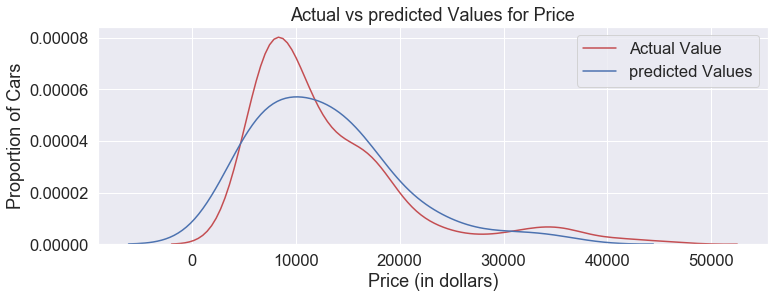

In [61]:
predicted = lm.predict(x_test)

plt.figure(figsize=(12, 4))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values" , ax=ax1)


plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

<a id="ref13"></a>
### 13. Polynomial Linear Regression

Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline.

In [62]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

we input the list as an argument to the pipeline constructor

In [63]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can now normalize the data,  perform a transform and fit the model simultaneously. 

In [64]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

###### Polynomial Linear Regression Evaluation

In [65]:
print("The R_squared value for Polynomial Linear Regression Model is: ", pipe.score(x_test, y_test))

The R_squared value for Polynomial Linear Regression Model is:  0.8634119656126615


We can say that ~ 85% of the variation of the price is explained by this polynomial regression model

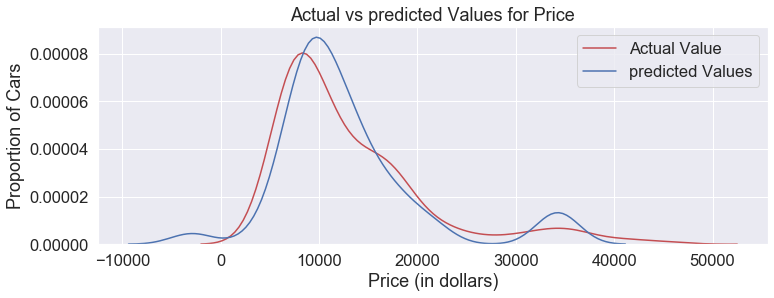

In [66]:
predicted = pipe.predict(x_test)

plt.figure(figsize=(12, 4))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values" , ax=ax1)


plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

As it can be seen that for Polynomial Linear Regression, the fitted values are much more closer to the actual values than Multiple Linear Regression.

<a id="ref14"></a>
### 14. Random Forest Regression

Random Forest is non linear regression based on decision trees.

In [67]:
Rf = RandomForestRegressor()
Rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

###### Random Forest Regression Evaluation

In [68]:
print("The R_squared value for Random Forest Regression Model is: ", Rf.score(x_test, y_test))

The R_squared value for Random Forest Regression Model is:  0.9506745321601764


We can say that ~ 95% of the variation of the price is explained by this random forest model

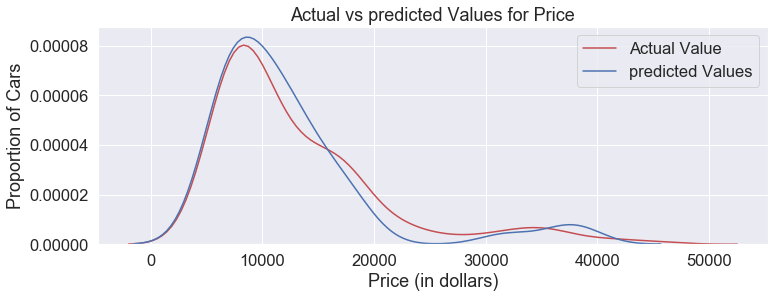

In [69]:
predicted = Rf.predict(x_test)

plt.figure(figsize=(12, 4))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="predicted Values" , ax=ax1)


plt.title('Actual vs predicted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the random forest model performed even better than polynomial regression.

<a id="ref15"></a>
### 15. Best Model Refinement

As can be seen, the best performing model with approximately 0.95 r-squared value is Random Forest. Now to refine it and make it perform even better, its hyper parameters tuning is done in grid search manner.

Creating Grid of hyperparameter values

In [70]:
# Number of trees in random forest
n_estimators = [100,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 40, 80, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Giving grid of values as parameter along with random forest model instance and number of cross validations

In [71]:
Rf_grid = GridSearchCV(estimator = Rf, param_grid = grid, cv = 2, n_jobs = -1, verbose = 2)

Fitting Random Forest models for all hyper parameters combinations

In [72]:
Rf_grid.fit(x_train,y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   29.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

Best performing Random Forest model

In [73]:
BestRf = Rf_grid.best_estimator_
BestRf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Best Performing Random Forest model R_squared value

In [74]:
print("After Refinement, the r_squared value is: ", BestRf.score(x_test,y_test))

After Refinement, the r_squared value is:  0.9542300291656741
